In [1]:
import sys  ###kldtest（3つのセルと下のグラフまで）
sys.path.append('../scripts/')
from robot import *            #以上のインポートは、主要なモジュールを全部読み込む手抜き
from scipy.stats import norm, chi2 #norm: ガウス分布（あとで使用）、chi2: カイ二乗分布

In [2]:
def num(epsilon, delta, binnum): #必要なパーティクルの数
    return math.ceil(chi2.ppf(1.0 - delta, binnum-1)/(2*epsilon)) #端数は切り上げ

<IPython.core.display.Javascript object>


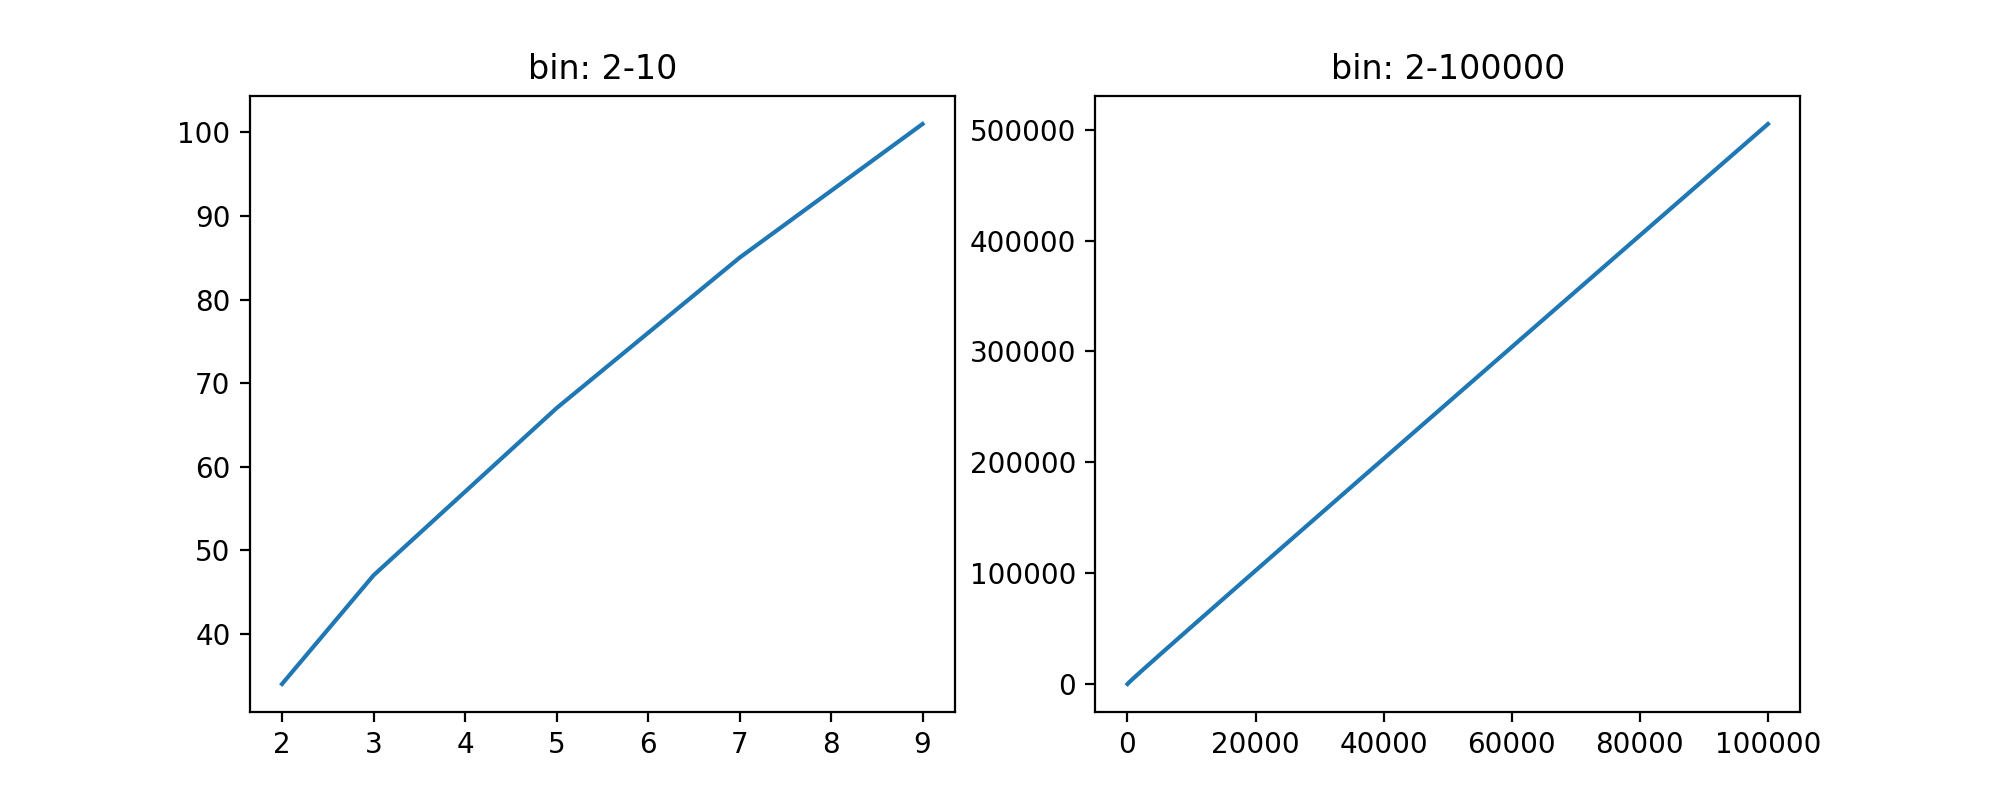

In [3]:
fig, (axl, axr) = plt.subplots(ncols=2, figsize=(10,4)) #二つ横並びで図を出力する準備

bs = np.arange(2, 10)
n = [num(0.1, 0.01, b) for b in bs] #ビンの数が2から10までのパーティクルの数
axl.set_title("bin: 2-10")
axl.plot(bs, n)

bs = np.arange(2, 100000)
n = [num(0.1, 0.01, b) for b in bs] #ビンの数が2から100000までのパーティクルの数
axr.set_title("bin: 2-100000")
axr.plot(bs, n)

plt.show()

In [4]:
def num_wh(epsilon, delta, binnum): ###kldtestwh（下まで）
    dof = binnum-1
    z = norm.ppf(1.0 - delta)
    return math.ceil(dof/(2*epsilon)*(1.0 - 2.0/(9*dof) + math.sqrt(2.0/(9*dof))*z )**3)

In [5]:
for binnum in 2, 4, 8, 1000, 10000, 100000: #様々なビンの数で比較
    print("ビン:", binnum, "ε=0.1, δ=0.01", num(0.1, 0.01, binnum), num_wh(0.1, 0.01, binnum)) 
    print("ビン:", binnum, "ε=0.5, δ=0.01", num(0.5, 0.01, binnum), num_wh(0.5, 0.01, binnum)) 
    print("ビン:", binnum, "ε=0.5, δ=0.05", num(0.5, 0.05, binnum), num_wh(0.5, 0.05, binnum)) 

ビン: 2 ε=0.1, δ=0.01 34 33
ビン: 2 ε=0.5, δ=0.01 7 7
ビン: 2 ε=0.5, δ=0.05 4 4
ビン: 4 ε=0.1, δ=0.01 57 57
ビン: 4 ε=0.5, δ=0.01 12 12
ビン: 4 ε=0.5, δ=0.05 8 8
ビン: 8 ε=0.1, δ=0.01 93 93
ビン: 8 ε=0.5, δ=0.01 19 19
ビン: 8 ε=0.5, δ=0.05 15 15
ビン: 1000 ε=0.1, δ=0.01 5530 5530
ビン: 1000 ε=0.5, δ=0.01 1106 1106
ビン: 1000 ε=0.5, δ=0.05 1074 1074
ビン: 10000 ε=0.1, δ=0.01 51655 51655
ビン: 10000 ε=0.5, δ=0.01 10331 10331
ビン: 10000 ε=0.5, δ=0.05 10233 10233
ビン: 100000 ε=0.1, δ=0.01 505212 505212
ビン: 100000 ε=0.5, δ=0.01 101043 101043
ビン: 100000 ε=0.5, δ=0.05 100736 100736
